# Focusing light with a lens: vector approach

In this example, we will use the vectorial approach to calculate the electric field of a plane wave focused by a lens. We will use the XZ scheme, where the wave propagates in the X direction and the lens is in the XZ plane. The lens is a semi-cylinder with refractive index $n$=2.5 for a near focusing.

In [1]:
from diffractio import np
from diffractio import degrees, um

In [2]:
from diffractio.vector_fields_X import Vector_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.vector_fields_XZ import Vector_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [3]:
from py_pol.jones_vector import Jones_vector

## Scalar definition in XZ scheme

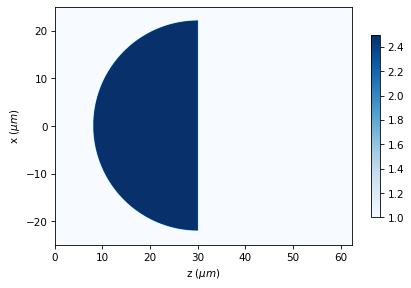

In [4]:
size=50* um

x0 = np.linspace(-size/2 , size/2, 2048)
z0 = np.linspace(0*um, 1.25*size, 2048)
wavelength = 2*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave()

u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

u_xz.incident_field(u0)

u_xz.semi_cylinder(r0=(0*um, size/2 + 5*um),
                radius = 22*um,
                angle = 180*degrees,
                refractive_index = 2.5)


u_xz.draw_refractive_index(scale='scaled', colorbar_kind='vertical')


### Scalar calculation in XZ scheme

In [5]:
u_xz.WPM(verbose=False, has_edges=30*um)

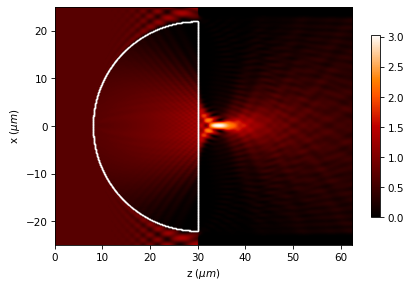

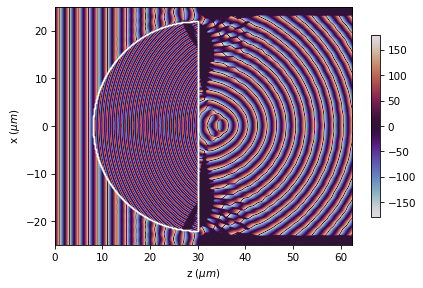

In [6]:
u_xz.draw(logarithm=1, scale='scaled',  colorbar_kind='vertical',  draw_borders=True)
u_xz.draw('phase', scale='scaled',  colorbar_kind='vertical', draw_borders=True, percentage_intensity=0.001)

### Vectorial calculation in XZ scheme

In [7]:
# definition of polarization
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+0.707]   
[+0.707]   



In [8]:
# add vector incident field and refractive index to Vector_field_XZ

EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)

In [9]:
# Computation 
EH_xz.FP_WPM(has_edges=30*um, verbose=False)

### Drawings

<Figure size 480x360 with 0 Axes>

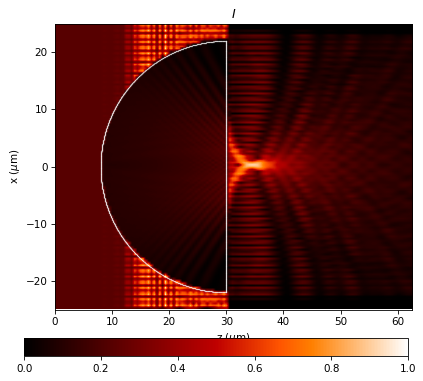

In [10]:
EH_xz.draw('intensity', logarithm=1, draw_borders=True, scale='scaled')

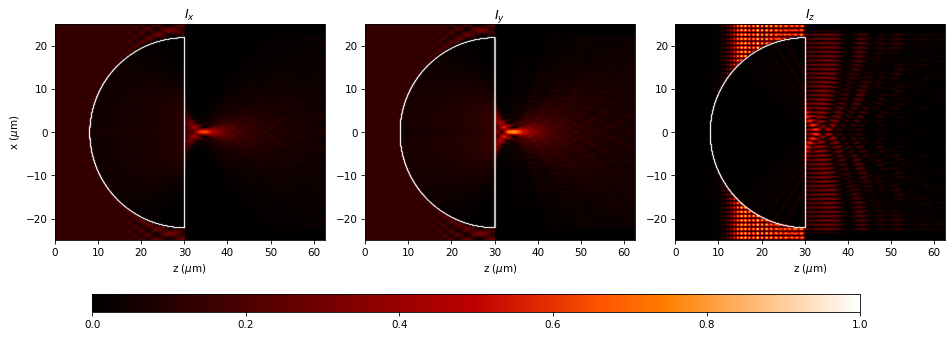

In [11]:
EH_xz.draw('intensities', logarithm=1, draw_borders=True, scale='scaled')

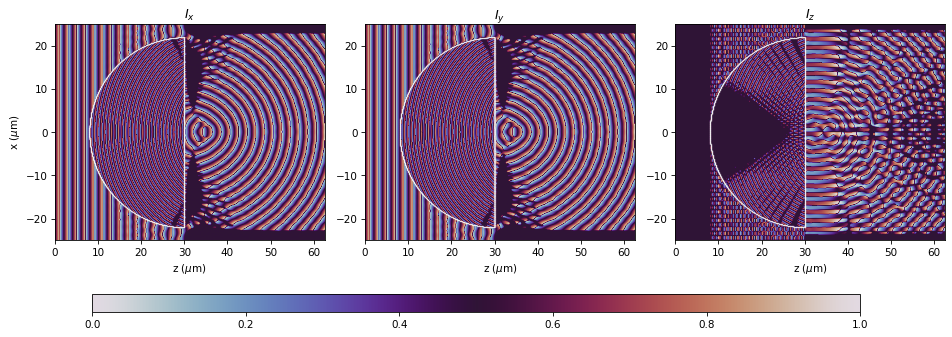

In [12]:
EH_xz.draw('phases', percentage_intensity=0.001, draw_borders=True, scale='scaled')

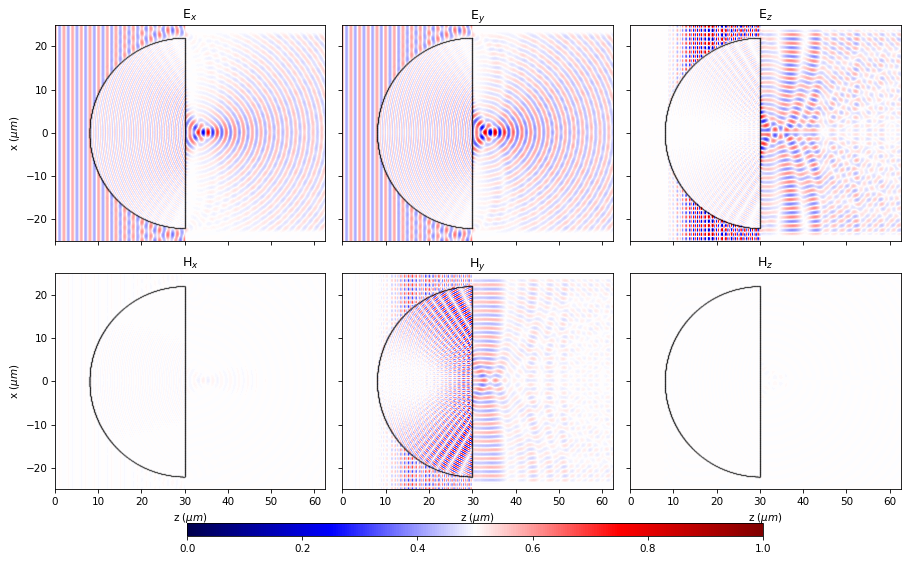

In [13]:
EH_xz.draw('EH', scale='scaled', color='k.', ms=0.05)

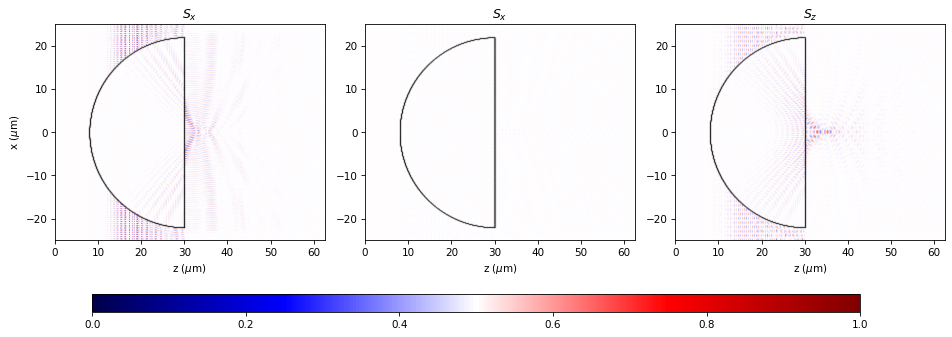

In [18]:
P_vector = EH_xz.draw('poynting_vector', scale='scaled', color='k.', ms=0.05)

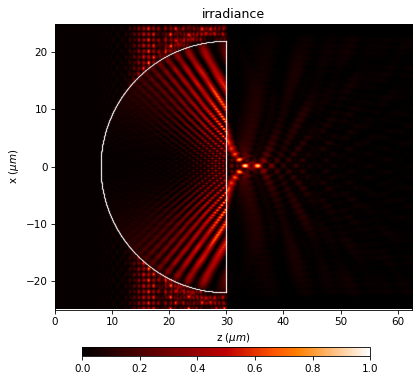

In [19]:
P_vector = EH_xz.draw('irradiance', scale='scaled')

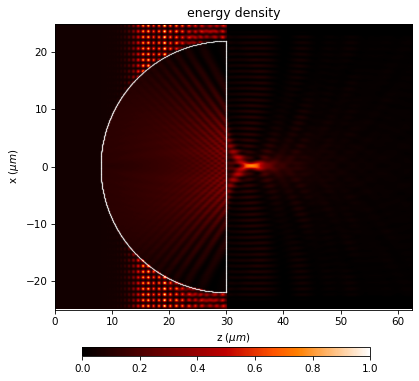

In [20]:
P_vector = EH_xz.draw('energy_density', scale='scaled')

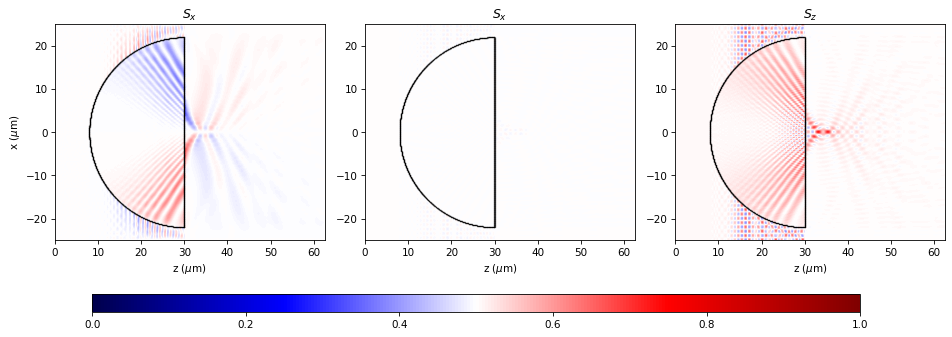

In [22]:
P_vector = EH_xz.draw('poynting_vector_averaged', scale='scaled', color='k.')

## Focusing light with a lens: inverted semi-cylinder

### Scalar definition in XZ scheme

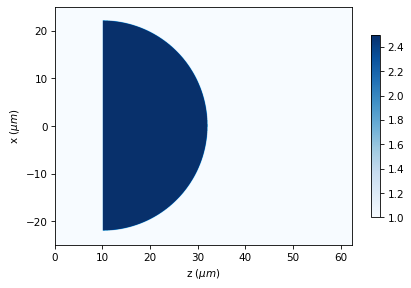

In [23]:
size=50* um

x0 = np.linspace(-size/2 , size/2, 2048)
z0 = np.linspace(0*um, 1.25*size, 2048)
wavelength = 2*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave()

u_xz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

u_xz.incident_field(u0)

u_xz.semi_cylinder(r0=(0*um, 10*um),
                radius=22*um,
                angle=0*degrees,
                refractive_index=2.5)


u_xz.draw_refractive_index(scale='scaled', colorbar_kind='vertical')


### Scalar calculation in XZ scheme

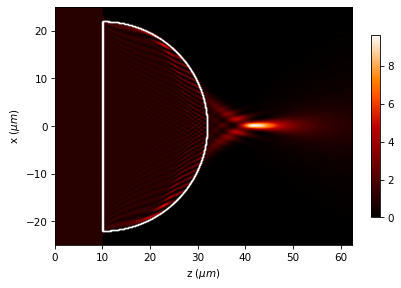

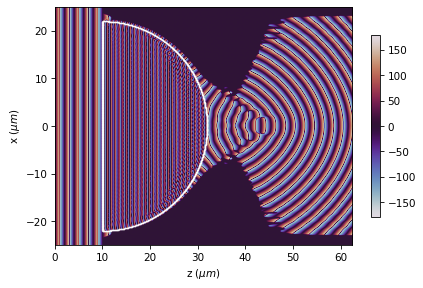

In [24]:
u_xz.WPM(verbose=False, has_edges=10*um)
u_xz.draw(logarithm=False, scale='scaled',  colorbar_kind='vertical',  draw_borders=True)
u_xz.draw('phase', scale='scaled',  colorbar_kind='vertical', draw_borders=True, percentage_intensity=0.001)

### Vectorial calculation in XZ scheme

In [25]:
# definition of polarization
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+0.707]   
[+0.707]   



In [26]:
# add vector incident field and refractive index to Vector_field_XZ

EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u_xz)

In [27]:
# Computation 
EH_xz.FP_WPM(has_edges=10*um, verbose=False)

### Drawings

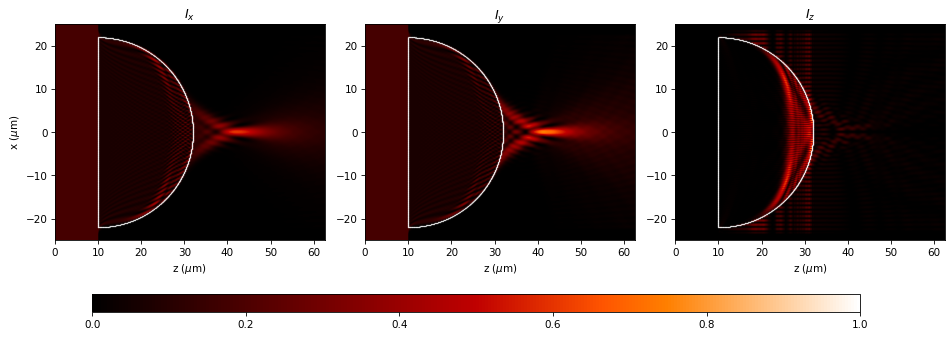

In [29]:
EH_xz.draw('intensities', logarithm=1, draw_borders=True, scale='scaled')

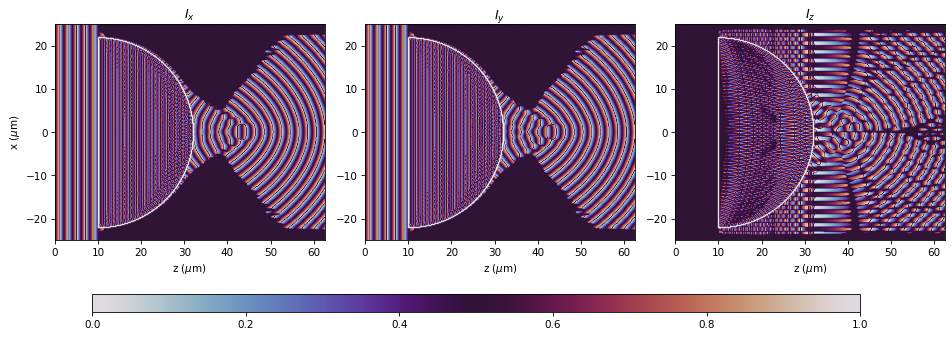

In [30]:
EH_xz.draw('phases', percentage_intensity=0.001, draw_borders=True, scale='scaled')

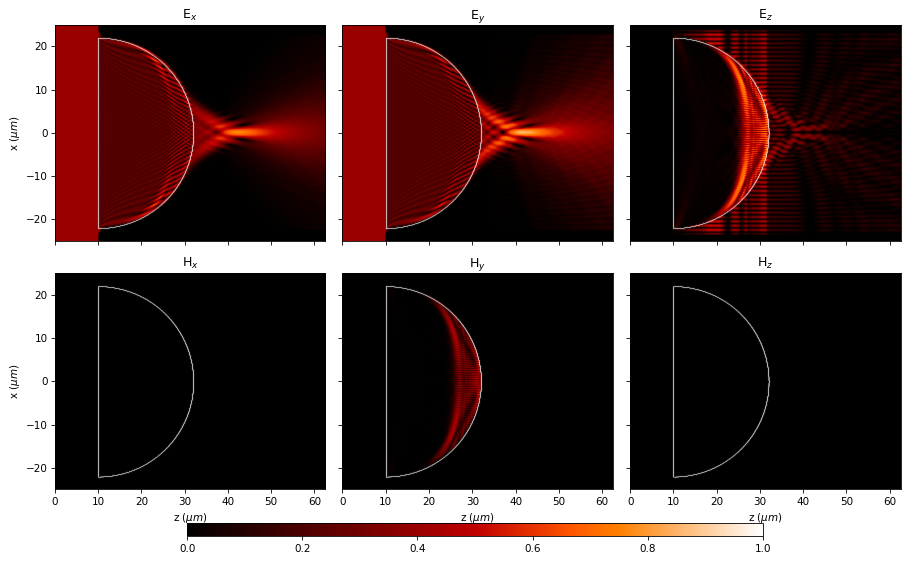

In [45]:
EH_xz.draw('E2H2', draw_borders=True, scale='scaled', color='w.', ms=0.05, logarithm=1e1)

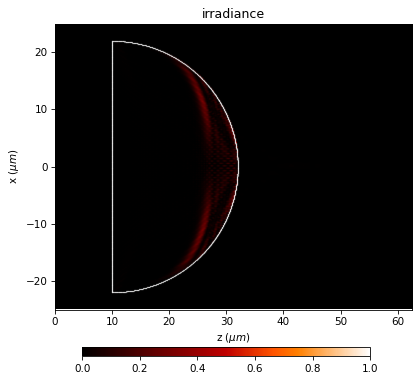

In [39]:
P_vector = EH_xz.draw('irradiance', scale='scaled', logarithm=1)

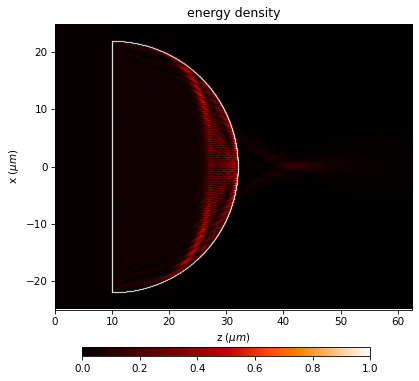

In [40]:
P_vector = EH_xz.draw('energy_density', scale='scaled', logarithm=1)

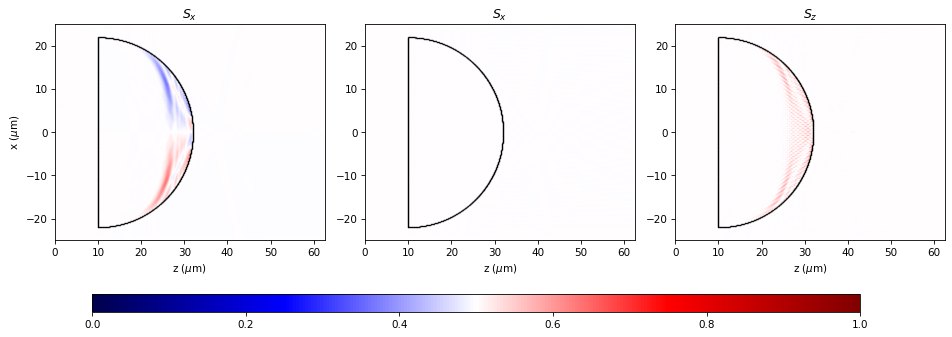

In [41]:
P_vector = EH_xz.draw('poynting_vector_averaged', scale='scaled', color='k.')